# NFL Quarterback Stats

### The goal is to visualize the completions, incompletions, touchdowns and interceptions with the help of [Next gen stats github repo](https://github.com/ArrowheadAnalytics/next-gen-scrapy-2.0)

#### First let's import the libraries:

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


#### Loading and inspecting the data:

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ArrowheadAnalytics/next-gen-scrapy-2.0/master/pass_and_game_data.csv', index_col=0)
df.head()

,week,name,pass_type,x,y,season,game_id,game_type,gameday,weekday,...,roof,surface,temp,wind,away_coach,home_coach,referee,stadium_id,stadium,defteam
posteam,,,,,,,,,,,,,,,,,,,,,
ARI,10,Kyler Murray,COMPLETE,7.567394,-3.016650,2020,2020_10_BUF_ARI,REG,2020-11-15,Sunday,...,NaN,NaN,NaN,NaN,Sean McDermott,Kliff Kingsbury,NaN,PHO00,State Farm Stadium,BUF
ARI,10,Kyler Murray,COMPLETE,-15.303610,-1.567681,2020,2020_10_BUF_ARI,REG,2020-11-15,Sunday,...,NaN,NaN,NaN,NaN,Sean McDermott,Kliff Kingsbury,NaN,PHO00,State Farm Stadium,BUF
ARI,10,Kyler Murray,COMPLETE,16.040816,3.505631,2020,2020_10_BUF_ARI,REG,2020-11-15,Sunday,...,NaN,NaN,NaN,NaN,Sean McDermott,Kliff Kingsbury,NaN,PHO00,State Farm Stadium,BUF
ARI,10,Kyler Murray,COMPLETE,-2.252197,4.390257,2020,2020_10_BUF_ARI,REG,2020-11-15,Sunday,...,NaN,NaN,NaN,NaN,Sean McDermott,Kliff Kingsbury,NaN,PHO00,State Farm Stadium,BUF
ARI,10,Kyler Murray,COMPLETE,25.880476,6.894967,2020,2020_10_BUF_ARI,REG,2020-11-15,Sunday,...,NaN,NaN,NaN,NaN,Sean McDermott,Kliff Kingsbury,NaN,PHO00,State Farm Stadium,BUF


#### Here the 'x' and 'y' columns tell us the position of the pass that was thrown with respect to the position of the quarterback. 

#### Now, since we are going to work with the 2020 season, let's check the data type of this column:

In [4]:
df['season'].dtype

dtype('int64')


#### Since it is and integer, now let's filter the data for only the 2020 season:

In [5]:
df_2020 = df.loc[df['season'] == 2020]


#### For the inspection, let's grab 2020 Russell Wilson's complete passes:

In [7]:
wilson = df_2020.loc[df_2020['name'] == 'Russell Wilson']

wilson.head()

,week,name,pass_type,x,y,season,game_id,game_type,gameday,weekday,...,roof,surface,temp,wind,away_coach,home_coach,referee,stadium_id,stadium,defteam
posteam,,,,,,,,,,,,,,,,,,,,,
SEA,11,Russell Wilson,COMPLETE,-20.083615,7.008217,2020,2020_11_ARI_SEA,REG,2020-11-19,Thursday,...,outdoors,NaN,NaN,NaN,Kliff Kingsbury,Pete Carroll,NaN,SEA00,Lumen Field,ARI
SEA,11,Russell Wilson,COMPLETE,14.289592,0.877197,2020,2020_11_ARI_SEA,REG,2020-11-19,Thursday,...,outdoors,NaN,NaN,NaN,Kliff Kingsbury,Pete Carroll,NaN,SEA00,Lumen Field,ARI
SEA,11,Russell Wilson,COMPLETE,-5.734997,-2.232204,2020,2020_11_ARI_SEA,REG,2020-11-19,Thursday,...,outdoors,NaN,NaN,NaN,Kliff Kingsbury,Pete Carroll,NaN,SEA00,Lumen Field,ARI
SEA,11,Russell Wilson,COMPLETE,1.327837,0.616703,2020,2020_11_ARI_SEA,REG,2020-11-19,Thursday,...,outdoors,NaN,NaN,NaN,Kliff Kingsbury,Pete Carroll,NaN,SEA00,Lumen Field,ARI
SEA,11,Russell Wilson,COMPLETE,-13.330568,-1.330202,2020,2020_11_ARI_SEA,REG,2020-11-19,Thursday,...,outdoors,NaN,NaN,NaN,Kliff Kingsbury,Pete Carroll,NaN,SEA00,Lumen Field,ARI



#### We need to know the different strings for pass_type:

In [8]:
wilson['pass_type'].unique()

array(['COMPLETE', 'TOUCHDOWN', 'INCOMPLETE', 'INTERCEPTION'],
      dtype=object)


#### Plotting only the completions:

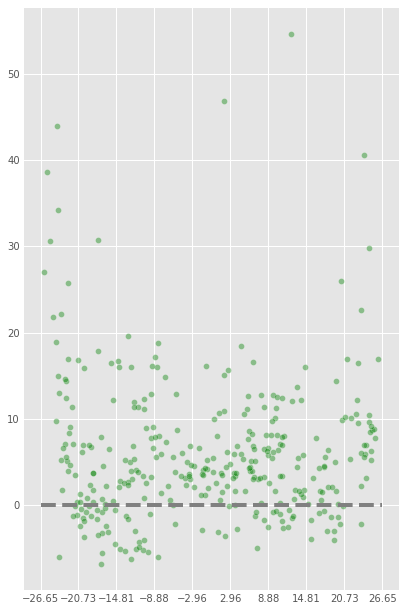

In [14]:
# filter complete passes
complete = wilson.loc[wilson['pass_type'] == 'COMPLETE']

# using ggplot base
plt.style.use('ggplot');

# set size to look like a football field
fig, ax = plt.subplots(figsize=(6, 10))

# scatter plot the x_coord and y_coord
ax.scatter(x=complete['x'], y=complete['y'], color='green', alpha=0.4, edgecolors='white');

# a football field is roughly 53.3 yards wide.
ax.set_yticks(np.arange(-20, 60, 10));
ax.set_xticks(np.linspace(-53.3/2, 53.3/2, 10))

# line of scrimmage where x = 0
ax.hlines(0, -53.3/2, 53.3/2, color='grey', linestyles='dashed');


#### Now, let's write a function to automate the process of picking each quarterback stats along with all the pass types:

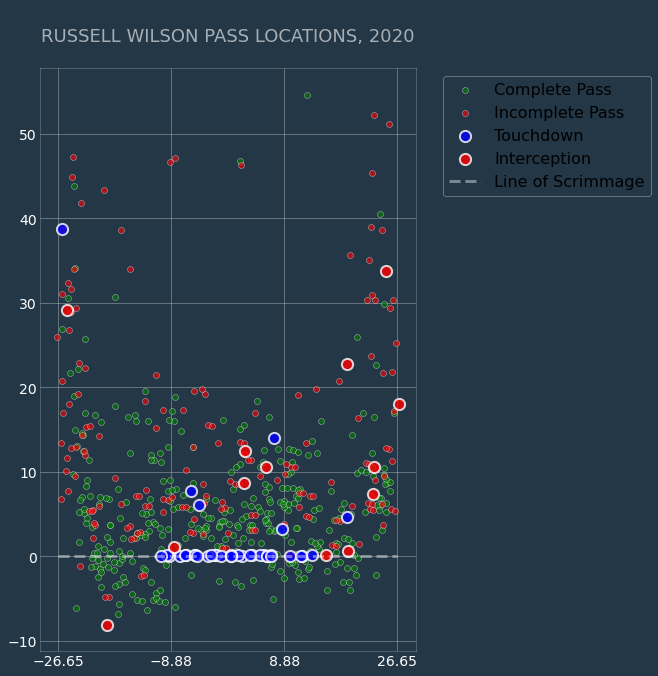

In [11]:
def plot_passes(player_name='Russell Wilson', year=2020):

  plt.style.use('fivethirtyeight')

  player = df.loc[(df['season'] == year) & (df['name'] == player_name)]

  #grab completions, incompletions, interceptions, and tds separately
  complete = player.loc[player['pass_type'] == 'COMPLETE']
  incomplete = player.loc[player['pass_type'] == 'INCOMPLETE']
  interception = player.loc[player['pass_type'] == 'INTERCEPTION']
  touchdown = player.loc[player['pass_type'] == 'TOUCHDOWN']

  fig, ax = plt.subplots(figsize=(6, 10))

  # scatter plot completions as small green dots with some transparency
  ax.scatter(complete['x'], complete['y'], color='green', alpha=0.6, edgecolors='white')
  # scatter plot incompletions as small red dots with some transparency
  ax.scatter(incomplete['x'], incomplete['y'], color='red', alpha=0.6, edgecolors='white')
  # scatter plot touchdowns as big green dots with less transparency and larger white outline
  ax.scatter(touchdown['x'], touchdown['y'], color='blue', alpha=0.8, edgecolors='white', linewidth=2, s=125)
  # scatter plot touchdowns as big red dots with less transparency and larger white outline
  ax.scatter(interception['x'], interception['y'], color='red', alpha=0.8, edgecolors='white', linewidth=2, s=125)


  ax.set_yticks(np.arange(-20, 60, 10));
  ax.set_xticks(np.linspace(-53.3/2, 53.3/2, 4))

  # style the ticks and the visualization border
  ax.tick_params(axis='x', colors="white", grid_alpha=0.4)
  ax.tick_params(axis='y', colors="white", grid_alpha=0.4)
  plt.setp(ax.spines.values(), color='white', alpha=0.2, linewidth=1)

  #line of scrimmage
  ax.hlines(0, -53.3/2, 53.3/2, color='white', linewidth=3, linestyles='dashed', alpha=0.4);

  # set the title of our plot (all caps)
  ax.set_title('\n'+ player_name.upper() + ' pass locations, '.upper() + str(year) + '\n', color='white', alpha=0.6, fontsize=18)

  # set the background color of our plot to a dark blue
  ax.set_facecolor('#233746')
  fig.set_facecolor('#233747')

  # set the legend off to the side
  ax.legend(['Complete Pass', 'Incomplete Pass', 'Touchdown', 'Interception', 'Line of Scrimmage'], 
            ncol=1, loc='upper left', bbox_to_anchor=(1.05, 1), facecolor='#233746', prop={'size': 16})

plot_passes()

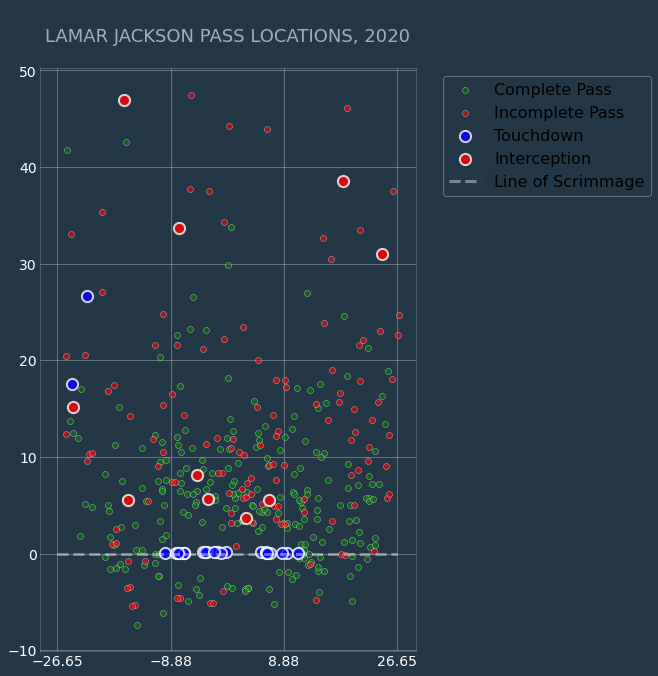

In [12]:
plot_passes(player_name='Lamar Jackson')